In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
df = pd.read_csv('fcc-forum-pageviews.csv')

In [4]:
print(df)

            date   value
0     2016-05-09    1201
1     2016-05-10    2329
2     2016-05-11    1716
3     2016-05-12   10539
4     2016-05-13    6933
...          ...     ...
1299  2019-11-29  171584
1300  2019-11-30  141161
1301  2019-12-01  142918
1302  2019-12-02  220144
1303  2019-12-03  158549

[1304 rows x 2 columns]


In [5]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [6]:
df.set_index('date')

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [7]:
top_cutoff = df['value'].quantile(0.975)
bottom_cutoff = df['value'].quantile(0.025)

In [8]:
print(top_cutoff)
print(bottom_cutoff)

177613.075
17876.4


In [9]:
df_cleaned = df[(df['value'] >= bottom_cutoff) & (df['value'] <= top_cutoff)]

In [10]:
print(df_cleaned)

            date   value
10    2016-05-19   19736
17    2016-05-26   18060
18    2016-05-27   19997
19    2016-05-28   19044
20    2016-05-29   20325
...          ...     ...
1294  2019-11-24  138875
1299  2019-11-29  171584
1300  2019-11-30  141161
1301  2019-12-01  142918
1303  2019-12-03  158549

[1238 rows x 2 columns]


In [11]:
df_cleaned.shape[0]

1238

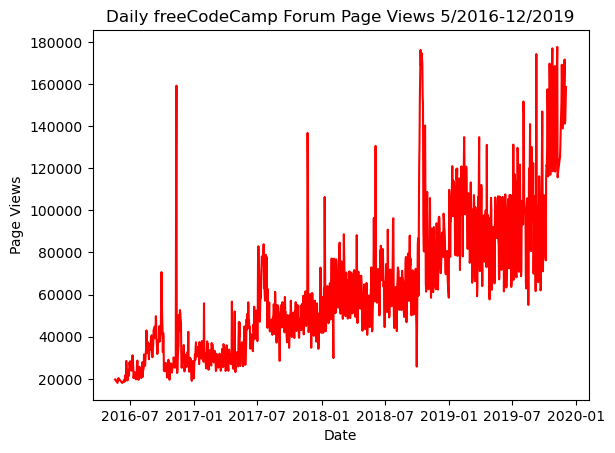

In [12]:
x_axis = pd.to_datetime(df_cleaned['date'])
y_axis = df_cleaned['value']

plt.plot(x_axis, y_axis, color= 'red')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()

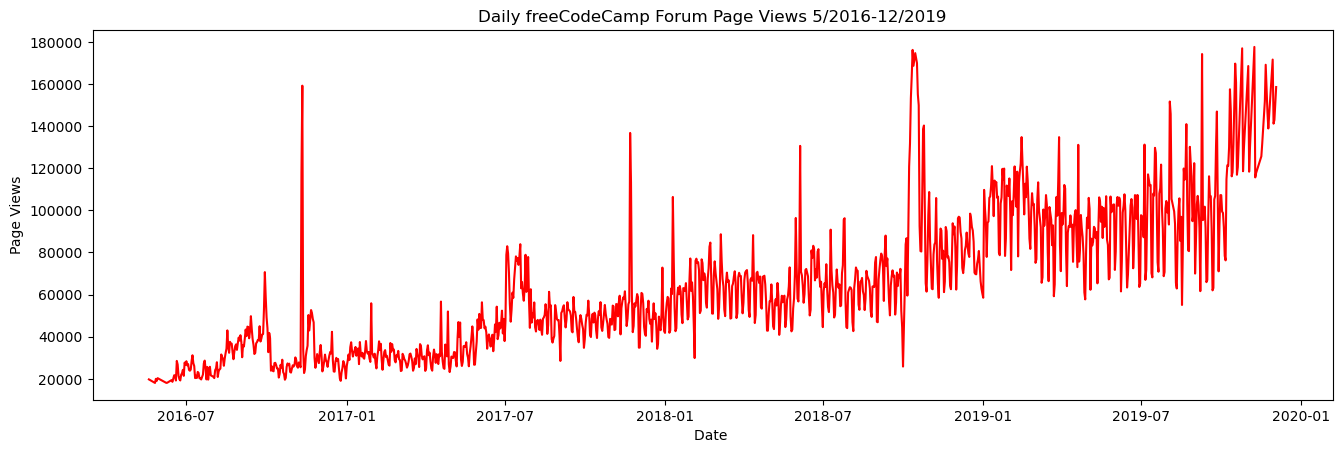

date     object
value     int64
dtype: object


In [13]:



f = plt.figure()
f.set_figwidth(16)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date ')
plt.ylabel('Page Views')

plt.plot(x_axis, y_axis, color= 'red')

plt.show()
print(df_cleaned.dtypes)

C:\Users\Kuba\AppData\Local\Temp\ipykernel_11192\3193771761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year']=pd.DatetimeIndex(dates).year
C:\Users\Kuba\AppData\Local\Temp\ipykernel_11192\3193771761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['month']=dates.dt.month_name(locale='English')


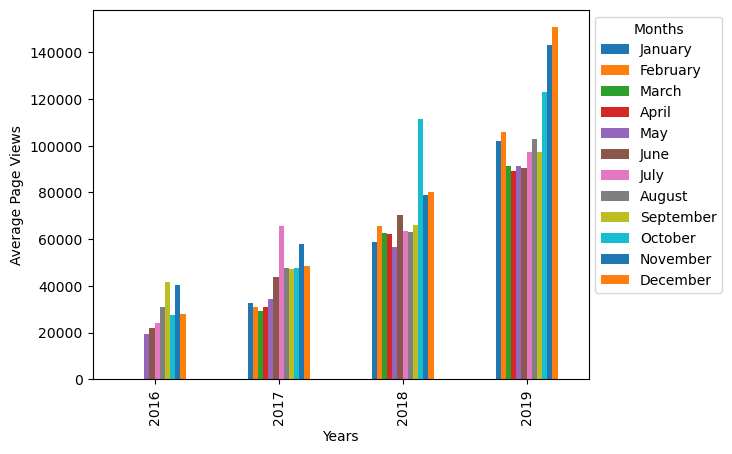

In [14]:

dates = pd.to_datetime(df_cleaned['date'])
df_cleaned['year']=pd.DatetimeIndex(dates).year


df_cleaned['month']=dates.dt.month_name(locale='English')

years = df_cleaned['year'].unique()


months = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']



# Create a pivot table to calculate average views for each month and year
pivot_df = df_cleaned.pivot_table(index='year', columns='month', values='value', aggfunc='mean')

# Reorder the columns to match the order of months list
pivot_df = pivot_df[months]

# Plot the data
pivot_df.plot(kind='bar')
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.legend(title='Months', bbox_to_anchor=(1, 1))
plt.show()

C:\Users\Kuba\AppData\Local\Temp\ipykernel_11192\3193771761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year']=pd.DatetimeIndex(dates).year
C:\Users\Kuba\AppData\Local\Temp\ipykernel_11192\3193771761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['month']=dates.dt.month_name(locale='English')


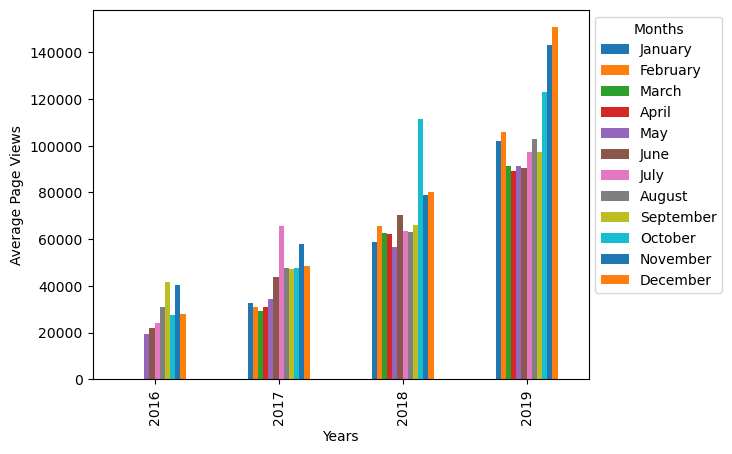

In [15]:

dates = pd.to_datetime(df_cleaned['date'])
df_cleaned['year']=pd.DatetimeIndex(dates).year


df_cleaned['month']=dates.dt.month_name(locale='English')

years = df_cleaned['year'].unique()


months = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']



# Create a pivot table to calculate average views for each month and year
pivot_df = df_cleaned.pivot_table(index='year', columns='month', values='value', aggfunc='mean')

# Reorder the columns to match the order of months list
pivot_df = pivot_df[months]

# Plot the data
pivot_df.plot(kind='bar')
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.legend(title='Months', bbox_to_anchor=(1, 1))
plt.show()

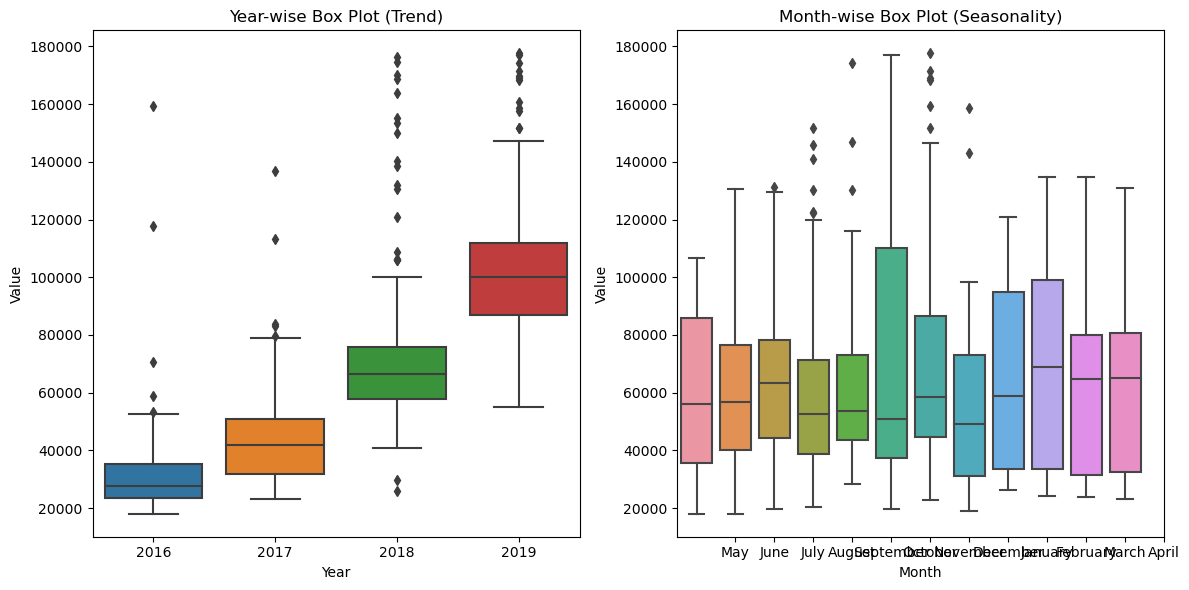

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_cleaned['year'], y=df_cleaned['value'])
plt.title('Year-wise Box Plot (Trend)')
plt.xlabel('Year')
plt.ylabel('Value')
# Month-wise Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['month'], y=df_cleaned['value'])
plt.title('Month-wise Box Plot (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Value')

# Set month labels starting from Jan
plt.xticks(ticks=range(1, 13), labels=df_cleaned['month'].unique())

plt.tight_layout()
plt.show()